In [59]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [83]:
# Load dataset
trade_df = pd.read_csv("C:/Users/PC/02_Forward School/Capstone Project-Alcon Marshall/00_Datasets/04 Import Export/trade_sitc_1d.csv")
trade_df['date'] = pd.to_datetime(trade_df['date'])
trade_df['year'] = trade_df['date'].dt.year

In [127]:
# Filter for years between 2000 and 2025
trade_filtered = trade_df[(trade_df['year'] >= 2000) & (trade_df['year'] <= 2025)]

# Summarize total exports and imports by year and section
summary_df = trade_filtered.groupby(['year', 'section'])[['exports', 'imports']].sum().reset_index()

# Convert export/import values to billions (RM) and round to 2 decimals
summary_df['exports_bil'] = (summary_df['exports'] / 1e9).round(2)
summary_df['imports_bil'] = (summary_df['imports'] / 1e9).round(2)

# Filter only 'overall' section
overall_summary = summary_df[summary_df['section'] == 'overall'][['year', 'exports_bil', 'imports_bil']]

# Rename columns for clarity
overall_summary.columns = ['Year', 'Exports (RM Billion)', 'Imports (RM Billion)']

# Reset index
overall_summary = overall_summary.reset_index(drop=True)

# Display the table
from IPython.display import display
display(overall_summary)

,Year,Exports (RM Billion),Imports (RM Billion)
0,2000,373.27,311.46
1,2001,334.28,280.23
2,2002,357.43,303.09
3,2003,397.88,316.54
4,2004,481.25,399.63
5,2005,536.23,432.87
6,2006,589.24,478.15
7,2007,604.30,502.04
8,2008,663.01,519.80
9,2009,552.52,434.67


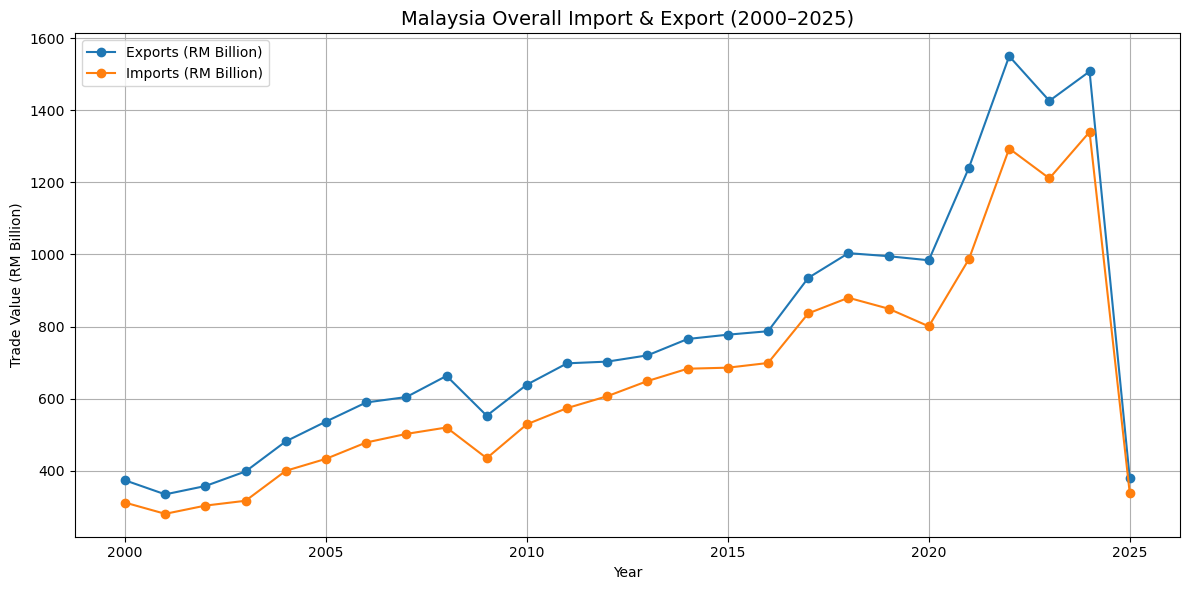

In [125]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(12, 6))
plt.plot(overall_summary['Year'], overall_summary['Exports (RM Billion)'], marker='o', label='Exports (RM Billion)')
plt.plot(overall_summary['Year'], overall_summary['Imports (RM Billion)'], marker='o', label='Imports (RM Billion)')

# Styling
plt.title("Malaysia Overall Import & Export (2000–2025)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Trade Value (RM Billion)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

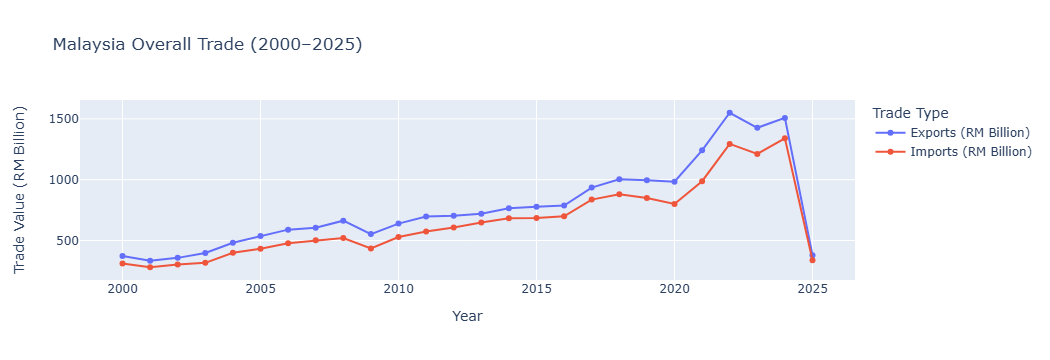

In [129]:
import plotly.express as px

fig = px.line(
    overall_summary,
    x='Year',
    y=['Exports (RM Billion)', 'Imports (RM Billion)'],
    title="Malaysia Overall Trade (2000–2025)",
    markers=True,
    labels={"value": "Trade Value (RM Billion)", "variable": "Trade Type"}
)
fig.update_layout(legend_title_text="Trade Type")
fig.show()


In [ ]:
# Filter for 'section 0'
section0_summary = summary_df[summary_df['section'] == '0'][['year', 'exports_bil', 'imports_bil']]

# Rename and reset index
section0_summary.columns = ['Year', 'Exports (RM Billion)', 'Imports (RM Billion)']
section0_summary = section0_summary.reset_index(drop=True)

# Display the table
from IPython.display import display
display(section0_summary)

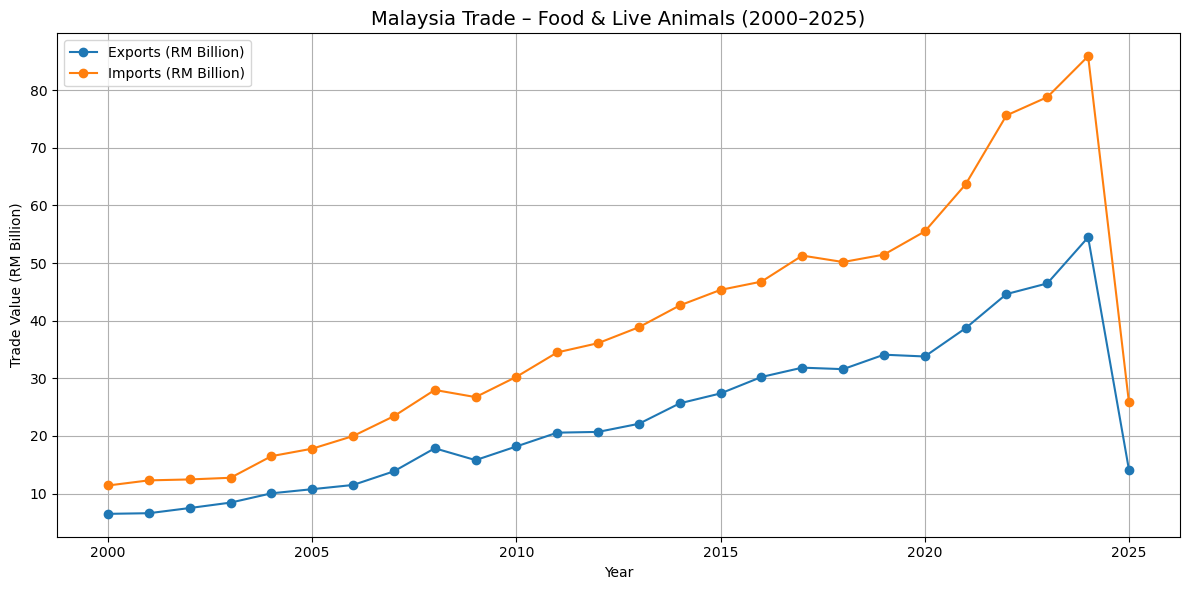

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(section0_summary['Year'], section0_summary['Exports (RM Billion)'], marker='o', label='Exports (RM Billion)')
plt.plot(section0_summary['Year'], section0_summary['Imports (RM Billion)'], marker='o', label='Imports (RM Billion)')

plt.title("Malaysia Trade – Food & Live Animals (2000–2025)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Trade Value (RM Billion)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


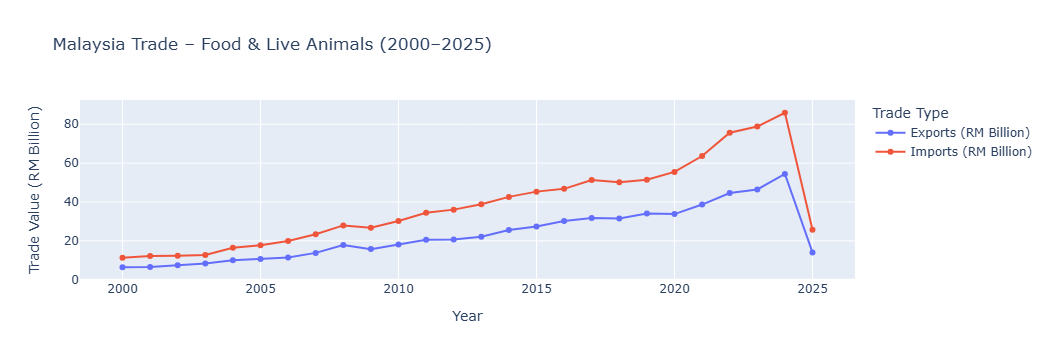

In [123]:
import plotly.express as px

fig = px.line(
    section0_summary,
    x='Year',
    y=['Exports (RM Billion)', 'Imports (RM Billion)'],
    title="Malaysia Trade – Food & Live Animals (2000–2025)",
    markers=True,
    labels={"value": "Trade Value (RM Billion)", "variable": "Trade Type"}
)
fig.update_layout(legend_title_text="Trade Type")
fig.show()
